In [13]:
import garpar as gp
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
merval = gp.datasets.load_merval2021_2022()

In [26]:
merval.as_returns().describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,521.0,0.002008,0.032105,-0.163174,-0.013648,0.000142,0.016098,0.177089
std,0.0,0.000939,0.005629,0.107907,0.004659,0.001212,0.004511,0.067552
min,521.0,-0.000790,0.022090,-0.767338,-0.022289,-0.003125,0.005780,0.094017
25%,521.0,0.001492,0.027886,-0.173983,-0.016265,0.000000,0.013165,0.132734
50%,521.0,0.002066,0.031220,-0.136739,-0.014286,0.000000,0.015079,0.157351
75%,521.0,0.002717,0.034825,-0.107194,-0.011817,0.000000,0.020160,0.196326
max,521.0,0.003701,0.050373,-0.078125,0.000000,0.003922,0.025175,0.440129


In [27]:
optimizador = gp.optimize.Markowitz(target_return = 0.001)
merval = optimizador.optimize(merval)

In [28]:
dfbe = pd.read_pickle("normal_markowiks_entropy_0.1.pkl")
dfbe

,entropy,stocks_seleccionados,beta_portafolio,varianza_portafolio,VaR_portafolio,Sharpe_Ratio,Treynor_Ratio,Entropia_cruzada,Entropia_KeyZang,Entropia_Zheng,Ratio_diversific,CV_Contribuciones_marginales,Indice_diversific_port
0,0.1,51,0.980048,0.000124,0.007544,2.741076,0.010781,0.232471,3.787101,3.786977,0.486435,0.689069,-0.008954
1,0.1,51,0.884899,0.000131,0.007528,1.357199,-0.005055,0.122189,3.845036,3.844905,0.470121,0.393879,-0.000765
2,0.1,52,0.873192,0.000124,0.007520,2.169666,0.004817,0.158948,3.826437,3.826313,0.481121,0.561505,0.012056
3,0.1,52,0.850241,0.000125,0.007446,1.678215,-0.001467,0.148254,3.836854,3.836729,0.476477,0.463258,0.000113
4,0.1,52,0.898318,0.000134,0.007536,1.774374,0.000611,0.117145,3.852313,3.852179,0.465476,0.515746,-0.023388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.1,52,0.885142,0.000129,0.007498,2.349201,0.007509,0.103437,3.859074,3.858945,0.473100,0.442910,-0.010529
996,0.1,52,0.871242,0.000109,0.007412,1.555261,-0.004310,0.098576,3.870276,3.870167,0.510580,0.390057,-0.004279
997,0.1,52,0.893557,0.000110,0.007529,1.737231,-0.002035,0.073706,3.879223,3.879113,0.511205,0.398950,0.000757
998,0.1,51,0.905945,0.000115,0.007514,1.881687,0.000178,0.063520,3.873347,3.873232,0.501753,0.342218,0.012397


In [39]:
mopt = merval.wprune()
merval_metrics = {
        "stocks_seleccionados": len(mopt.stocks),
        "beta_portafolio": mopt.risk.pf_beta(),
        "varianza_portafolio": mopt.risk.pf_var(),
        "VaR_portafolio": np.sum(mopt.risk.value() * mopt.weights),
        "Sharpe_Ratio": mopt.risk.sharpe(),
        "Treynor_Ratio": mopt.risk.treynor_ratio(),
        "Entropia_cruzada": mopt.div.cross_entropy(),
        "Entropia_KeyZang": mopt.div.ke_zang_entropy(),
        "Entropia_Zheng": mopt.div.zheng_entropy(),
        #"Delta_diversific": mopt.div.delta(),
        "Ratio_diversific": mopt.div.ratio(),
        "CV_Contribuciones_marginales":(mopt.div.mrc() *  mopt.weights).std() / (mopt.div.mrc() *  mopt.weights).mean(),
        "Indice_diversific_port": mopt.div.pdi(n_components=5, random_state=100),
        
       
    }

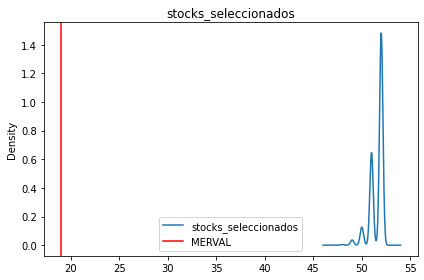

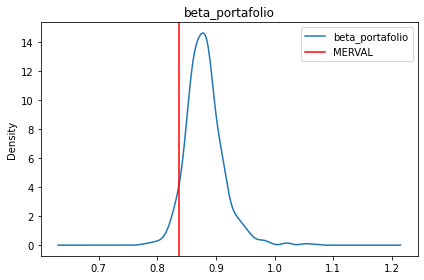

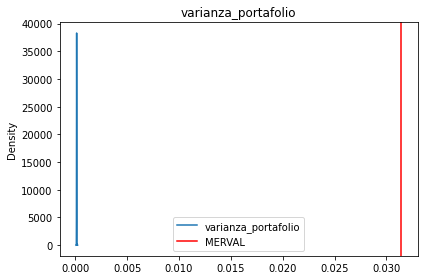

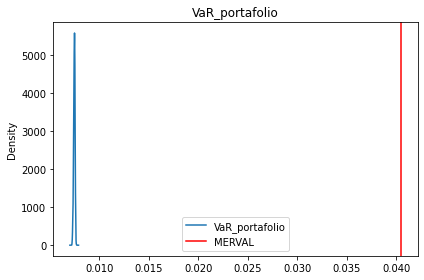

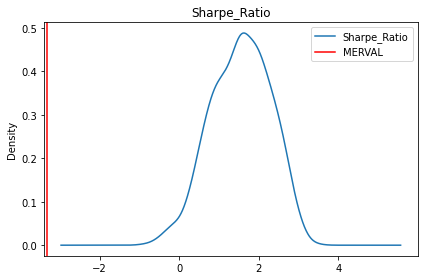

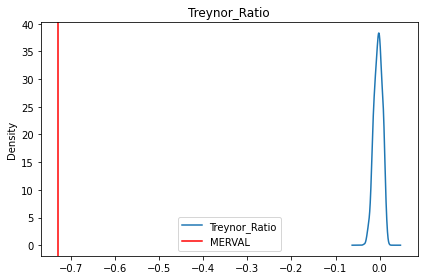

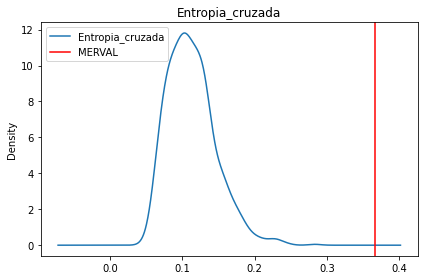

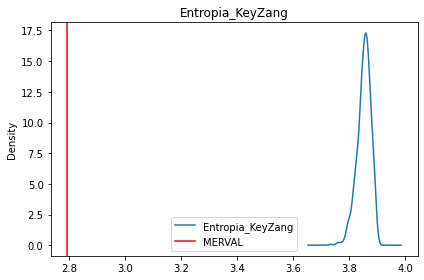

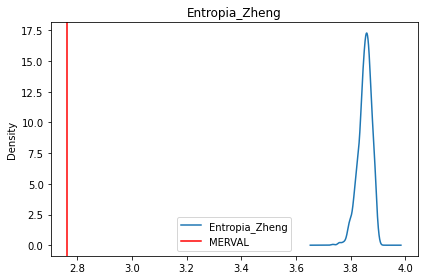

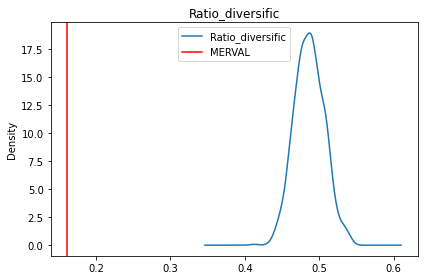

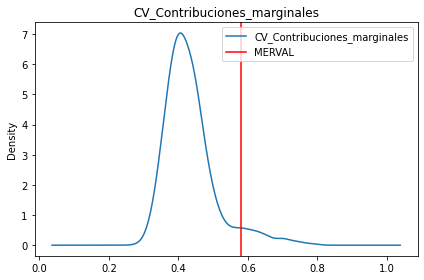

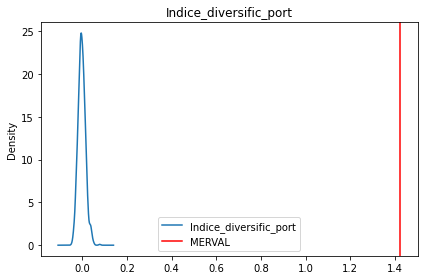

In [40]:
for metric in merval_metrics:
    ax = dfbe[metric].plot.kde()
    ax.set_title(metric)
    ax.axvline(merval_metrics[metric], color="red", label="MERVAL")
    ax.legend()
    plt.tight_layout()
    plt.show()


In [41]:
dfme = pd.read_pickle("normal_markowiks_entropy_0.5.pkl")
dfme

,stocks_seleccionados,beta_portafolio,varianza_portafolio,VaR_portafolio,Sharpe_Ratio,Treynor_Ratio,Entropia_cruzada,Entropia_KeyZang,Entropia_Zheng,Ratio_diversific,CV_Contribuciones_marginales,Indice_diversific_port
0,49,1.000980,0.000122,0.007557,2.942717,0.012521,0.118715,3.802054,3.801932,0.489687,0.627516,0.026029
1,51,0.836933,0.000114,0.007492,0.766923,-0.014127,0.149722,3.828377,3.828263,0.500603,0.432535,0.001554
2,52,0.878360,0.000112,0.007539,2.165958,0.003285,0.153064,3.847832,3.847720,0.508207,0.511589,-0.004501
3,51,0.894165,0.000122,0.007402,0.871254,-0.011590,0.090566,3.852436,3.852313,0.479913,0.397137,-0.010312
4,50,0.855976,0.000116,0.007447,0.246005,-0.020266,0.098128,3.825584,3.825468,0.494949,0.413682,0.000699
...,...,...,...,...,...,...,...,...,...,...,...,...
995,52,0.866353,0.000127,0.007410,1.032032,-0.009644,0.138184,3.845932,3.845805,0.469988,0.446185,0.006961
996,51,0.889261,0.000121,0.007549,2.165229,0.004340,0.108479,3.845487,3.845366,0.489506,0.428646,0.004047
997,51,0.844000,0.000107,0.007461,0.754097,-0.014460,0.106407,3.842260,3.842153,0.515580,0.417579,0.009013
998,52,0.824663,0.000106,0.007572,1.847619,-0.001187,0.137564,3.843844,3.843738,0.524376,0.453196,0.008302


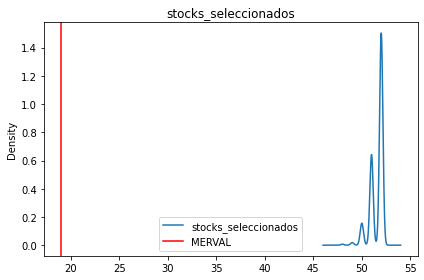

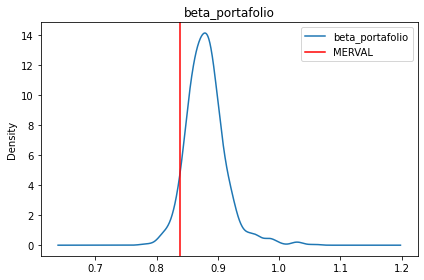

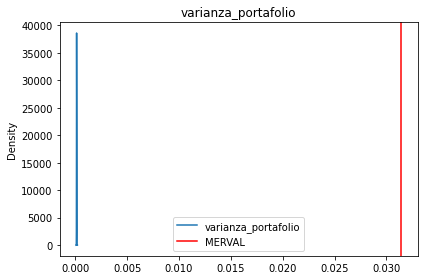

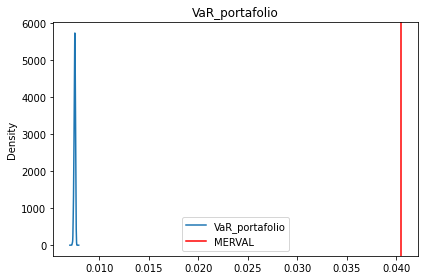

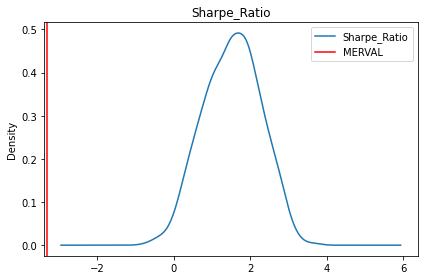

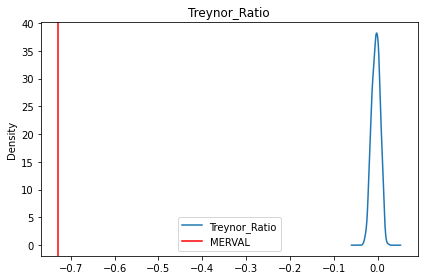

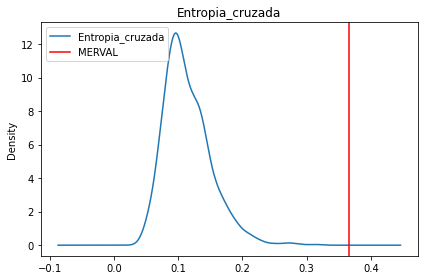

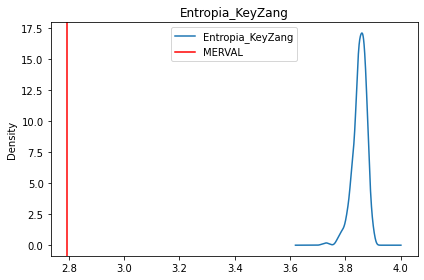

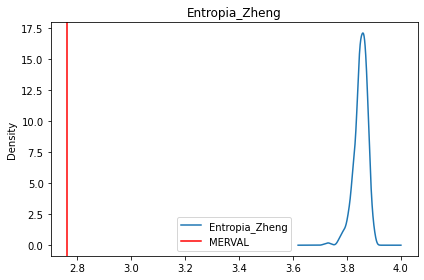

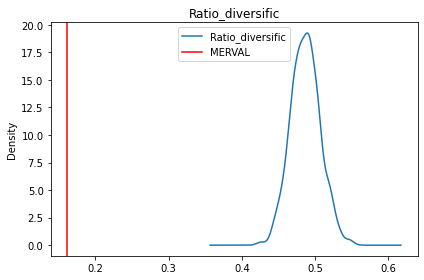

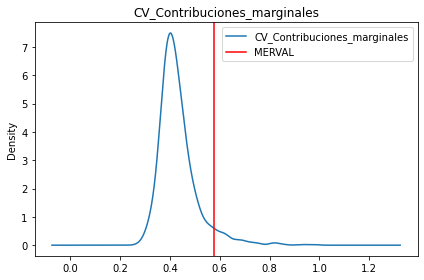

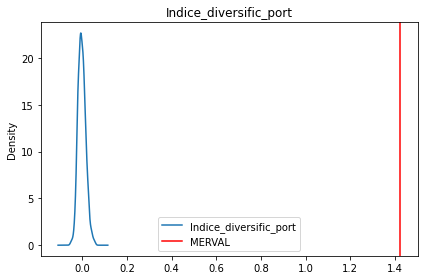

In [42]:
for metric in merval_metrics:
    ax = dfme[metric].plot.kde()
    ax.set_title(metric)
    ax.axvline(merval_metrics[metric], color="red", label="MERVAL")
    ax.legend()
    plt.tight_layout()
    plt.show()

In [43]:
dfae = pd.read_pickle("normal_markowiks_entropy_0.9.pkl")
dfae

,stocks_seleccionados,beta_portafolio,varianza_portafolio,VaR_portafolio,Sharpe_Ratio,Treynor_Ratio,Entropia_cruzada,Entropia_KeyZang,Entropia_Zheng,Ratio_diversific,CV_Contribuciones_marginales,Indice_diversific_port
0,52,0.904642,0.000538,0.018239,1.343987,0.012344,0.133665,3.843749,3.843211,0.483688,0.448203,0.174792
1,52,0.904167,0.000519,0.017912,0.443738,-0.010937,0.092760,3.876795,3.876276,0.487211,0.371291,0.161741
2,51,0.892477,0.000474,0.018437,0.714790,-0.004966,0.081760,3.854720,3.854246,0.521454,0.405176,0.100777
3,51,0.868542,0.000485,0.017348,0.222931,-0.017375,0.126507,3.824267,3.823782,0.490128,0.459986,0.104030
4,48,0.849797,0.000519,0.017844,-0.080696,-0.025699,0.138265,3.752968,3.752449,0.484539,0.486712,0.135484
...,...,...,...,...,...,...,...,...,...,...,...,...
995,52,0.834329,0.000485,0.017552,0.683754,-0.005916,0.205646,3.808143,3.807657,0.497545,0.514472,0.190097
996,51,0.886738,0.000543,0.018348,1.708689,0.022352,0.157348,3.822498,3.821955,0.488050,0.456826,0.144051
997,52,0.885980,0.000551,0.017700,0.889454,0.001001,0.119187,3.843732,3.843181,0.467492,0.468042,0.079346
998,51,0.873707,0.000591,0.018250,1.790905,0.026930,0.160126,3.798359,3.797768,0.466455,0.515376,0.130441


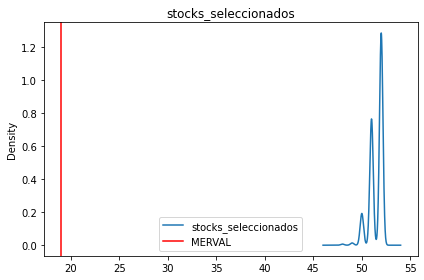

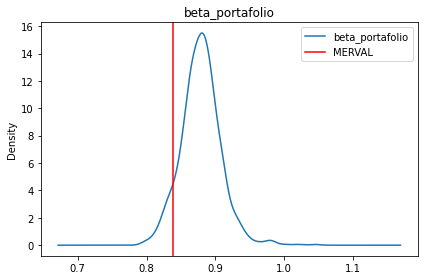

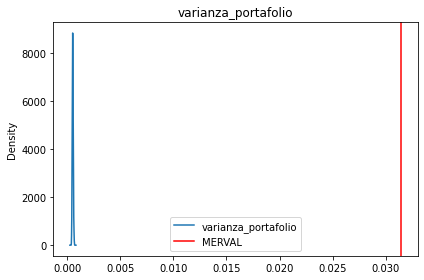

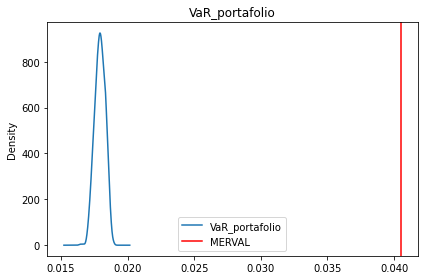

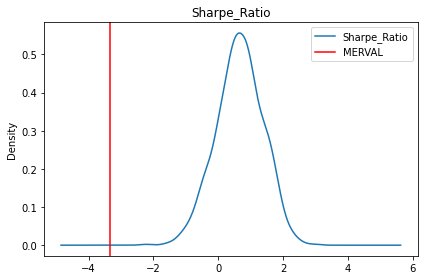

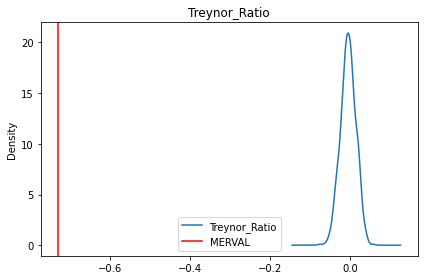

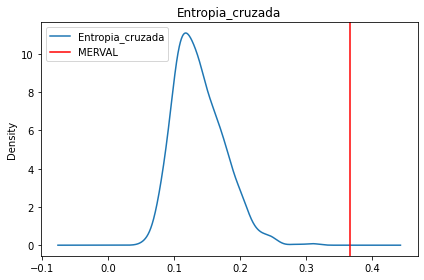

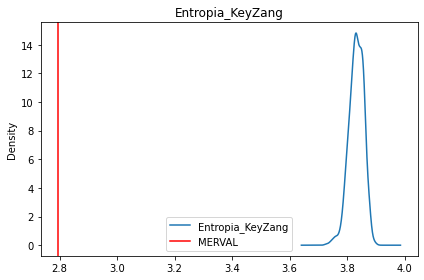

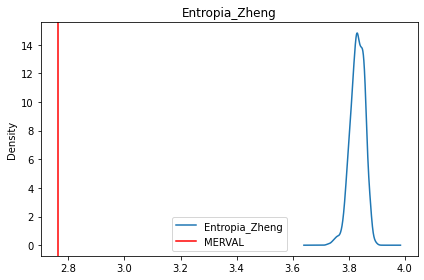

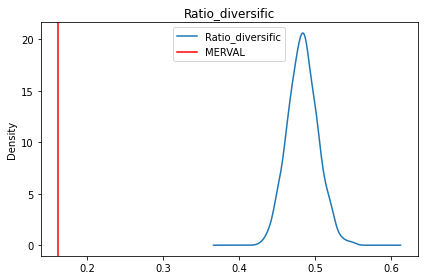

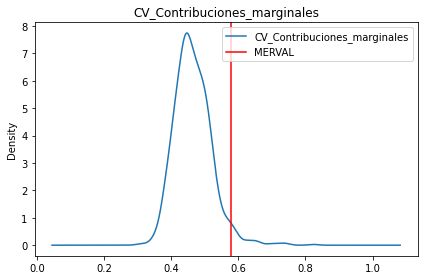

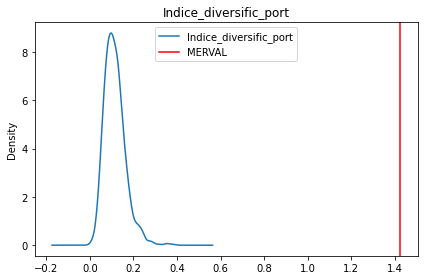

In [44]:
for metric in merval_metrics:
    ax = dfae[metric].plot.kde()
    ax.set_title(metric)
    ax.axvline(merval_metrics[metric], color="red", label="MERVAL")
    ax.legend()
    plt.tight_layout()
    plt.show()